In [1]:
#importing necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
import folium
import geopandas as gpd

pd.set_option('display.max_columns', 150, 'display.max_rows', 150)

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
#read in data
df = pd.read_csv('final_df.csv')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#drop first columns from df
df = df.drop(columns = ['Unnamed: 0'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73075 entries, 0 to 73074
Columns: 126 entries, YEAR to qnobese
dtypes: float64(123), object(3)
memory usage: 70.2+ MB


In [6]:
df.dtypes

YEAR                                      float64
raceeth                                   float64
q6orig                                     object
q7orig                                     object
record                                    float64
orig_rec                                  float64
How old are you                           float64
What is your sex                          float64
In what grade are you                     float64
Are you Hispanic/Latino                   float64
What is your race                          object
How tall are you                          float64
How much do you weigh                     float64
Seat belt use                             float64
Riding with a drinking driver             float64
Drinking and driving                      float64
Texting and driving                       float64
Weapon carrying                           float64
Weapon carrying at school                 float64
Gun carrying past 12 mos                  float64


In [7]:
df.head()

,YEAR,raceeth,q6orig,q7orig,record,orig_rec,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,What is your race,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Texting and driving,Weapon carrying,Weapon carrying at school,Gun carrying past 12 mos,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Sexual violence,Sexual dating violence,Physical dating violence,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Smoked > 10 cigarettes,Electronic vapor product use,Current electronic vapor use,EVP from store,Current smokeless tobacco use,Current cigar use,All tobacco product cessation,Initiation of alcohol use,Current alcohol use,Current binge drinking,Largest number of drinks,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever synthetic marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Sex of sexual contacts,Sexual identity,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Physical activity >= 5 days,Television watching,Computer use,PE attendance,Sports team participation,Concussion,HIV testing,STD testing,Oral health care,Asthma,Sleep,Grades in school,Current prescription pain medicine use,Ever used LSD,Sports drinks,Plain water,Food allergies,Muscle strengthening,Indoor tanning,Sunscreen,Difficulty concentrating,How well speak English,BMIPCT,weight,stratum,psu,Smoked>10 cigarettes,Current electronic vapor product use,Ever alcohol use,Physical activity>=5 days,Drive when using marijuana,Sunburn,Bicycle helmet use,Gun carrying,Injurious physical fighting,Cigarette from store,Smoking cessation,5 or more drinks in a row,Usual use of marijuana,NA- All tobacco product cessation,NA-Texting and driving,qnowt,qnobese
0,2019.0,7.0,504,121,1.0,NaN,5.0,2.0,2.0,1.0,A,1.63,54.89,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,2.0,6.0,2.0,5.0,1.0,1.0,2.0,1.0,46.882141,1.6659,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,8.0,503,119,2.0,NaN,4.0,2.0,2.0,2.0,A D,1.60,53.98,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,7.0,6.0,5.0,5.0,6.0,1.0,5.0,8.0,8.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0,7.0,2.0,6.0,1.0,1.0,2.0,1.0,62.232194,1.3851,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,8.0,506,95,3.0,NaN,4.0,1.0,2.0,2.0,B E,1.68,43.09,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0,2.0,2.0,5.0,2.0,2.0,8.0,4.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,5.0,2.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,2.0,1.0,0.590171,1.4958,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
df.isnull().sum()

YEAR                                          1
raceeth                                    1767
q6orig                                    17241
q7orig                                    19277
record                                    15426
orig_rec                                  73075
How old are you                             359
What is your sex                            470
In what grade are you                       522
Are you Hispanic/Latino                    1269
What is your race                          9779
How tall are you                           6567
How much do you weigh                      6567
Seat belt use                              7483
Riding with a drinking driver              1535
Drinking and driving                       5402
Texting and driving                       19841
Weapon carrying                            8094
Weapon carrying at school                  1919
Gun carrying past 12 mos                  48021
Safety concerns at school               

In [9]:
df.describe()

,YEAR,raceeth,record,orig_rec,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Texting and driving,Weapon carrying,Weapon carrying at school,Gun carrying past 12 mos,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Sexual violence,Sexual dating violence,Physical dating violence,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Smoked > 10 cigarettes,Electronic vapor product use,Current electronic vapor use,EVP from store,Current smokeless tobacco use,Current cigar use,All tobacco product cessation,Initiation of alcohol use,Current alcohol use,Current binge drinking,Largest number of drinks,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever synthetic marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Sex of sexual contacts,Sexual identity,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Physical activity >= 5 days,Television watching,Computer use,PE attendance,Sports team participation,Concussion,HIV testing,STD testing,Oral health care,Asthma,Sleep,Grades in school,Current prescription pain medicine use,Ever used LSD,Sports drinks,Plain water,Food allergies,Muscle strengthening,Indoor tanning,Sunscreen,Difficulty concentrating,How well speak English,BMIPCT,weight,stratum,psu,Smoked>10 cigarettes,Current electronic vapor product use,Ever alcohol use,Physical activity>=5 days,Drive when using marijuana,Sunburn,Bicycle helmet use,Gun carrying,Injurious physical fighting,Cigarette from store,Smoking cessation,5 or more drinks in a row,Usual use of marijuana,NA- All tobacco product cessation,NA-Texting and driving,qnowt,qnobese
count,73074.000000,71308.000000,57649.000000,0.0,72716.000000,72605.000000,72553.000000,71806.000000,66508.000000,66508.000000,65592.000000,71540.000000,67673.000000,53234.000000,64981.000000,71156.000000,25054.000000,70209.000000,72139.000000,64390.000000,71463.000000,69281.000000,24383.000000,51789.000000,55580.000000,71711.000000,70923.000000,72167.000000,72208.000000,71867.000000,59269.000000,56409.000000,62242.000000,66775.000000,69478.000000,10894.000000,42609.000000,28085.000000,24812.000000,70720.000000,70309.000000,20293.000000,70451.000000,65940.000000,53711.000000,42982.000000,59540.000000,69267.000000,71116.000000,71225.000000,42209.000000,70314.000000,70707.000000,65685.000000,69839.000000,70247.000000,69828.000000,64560.000000,67482.000000,71091.000000,65546.000000,66331.000000,66189.000000,66120.000000,65433.000000,65645.000000,64919.000000,36518.000000,41786.000000,69738.000000,64365.000000,70460.000000,70667.000000,69332.000000,69120.000000,69037.000000,69144.000000,68619.000000,60182.000000,62705.000000,13220.000000,70042.000000,70446.000000,68735.000000,62715.000000,25686.000000,65589.000000,10206.000000,41524.000000,68313.000000,63983.000000,39454.000000,8677.000000,55800.000000,31787.000000,32208.000000,30342.000000,54467.000000,56461.000000,33263.000000,30225.000000,30312.000000,6.650800e+04,73074.000000,73074.000000,73074.000000,52961.000000,12844.000000,28828.000000,57841.000000,11255.000000,21894.000000,13162.00000,13263.000000,13340.000000,14426.000000,13288.000000,14967.000000,11146.000000,27122.000000,12792.000000,14285.000000,14285.000000
mean,20

In [10]:
df[df.YEAR.isnull()]

,YEAR,raceeth,q6orig,q7orig,record,orig_rec,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,What is your race,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Texting and driving,Weapon carrying,Weapon carrying at school,Gun carrying past 12 mos,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Sexual violence,Sexual dating violence,Physical dating violence,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Smoked > 10 cigarettes,Electronic vapor product use,Current electronic vapor use,EVP from store,Current smokeless tobacco use,Current cigar use,All tobacco product cessation,Initiation of alcohol use,Current alcohol use,Current binge drinking,Largest number of drinks,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever synthetic marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Sex of sexual contacts,Sexual identity,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Physical activity >= 5 days,Television watching,Computer use,PE attendance,Sports team participation,Concussion,HIV testing,STD testing,Oral health care,Asthma,Sleep,Grades in school,Current prescription pain medicine use,Ever used LSD,Sports drinks,Plain water,Food allergies,Muscle strengthening,Indoor tanning,Sunscreen,Difficulty concentrating,How well speak English,BMIPCT,weight,stratum,psu,Smoked>10 cigarettes,Current electronic vapor product use,Ever alcohol use,Physical activity>=5 days,Drive when using marijuana,Sunburn,Bicycle helmet use,Gun carrying,Injurious physical fighting,Cigarette from store,Smoking cessation,5 or more drinks in a row,Usual use of marijuana,NA- All tobacco product cessation,NA-Texting and driving,qnowt,qnobese
13677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.dropna(how='all')
df.isnull().sum()


YEAR                                          0
raceeth                                    1766
q6orig                                    17240
q7orig                                    19276
record                                    15425
orig_rec                                  73074
How old are you                             358
What is your sex                            469
In what grade are you                       521
Are you Hispanic/Latino                    1268
What is your race                          9778
How tall are you                           6566
How much do you weigh                      6566
Seat belt use                              7482
Riding with a drinking driver              1534
Drinking and driving                       5401
Texting and driving                       19840
Weapon carrying                            8093
Weapon carrying at school                  1918
Gun carrying past 12 mos                  48020
Safety concerns at school               

In [12]:
df[['NA-Texting and driving']].value_counts()

NA-Texting and driving
1.0                       8750
2.0                       1103
7.0                       1068
3.0                        617
5.0                        509
4.0                        412
6.0                        333
dtype: int64

In [13]:
dct = {1.0:2.0, 2.0:3.0, 3.0:4.0, 4.0:5.0, 5.0:6.0, 6.0:7.0, 7.0:8.0}

df['NA-Texting and driving'].replace(dct, inplace=True)

In [14]:
df[['NA-Texting and driving']].value_counts()

NA-Texting and driving
2.0                       8750
3.0                       1103
8.0                       1068
4.0                        617
6.0                        509
5.0                        412
7.0                        333
dtype: int64

In [15]:
df[['Texting and driving']].value_counts()

Texting and driving
1.0                    21020
2.0                    19703
3.0                     3885
8.0                     2933
4.0                     1940
6.0                     1430
5.0                     1256
7.0                     1067
dtype: int64

In [16]:
# df['Texting and driving'] = np.where(df['Texting and driving'].isnull(), df['NA-Texting and driving'], df['Texting and driving'])

df['Texting and driving'].fillna(df['NA-Texting and driving'], inplace=True)


In [17]:
df.isnull().sum()

YEAR                                          0
raceeth                                    1766
q6orig                                    17240
q7orig                                    19276
record                                    15425
orig_rec                                  73074
How old are you                             358
What is your sex                            469
In what grade are you                       521
Are you Hispanic/Latino                    1268
What is your race                          9778
How tall are you                           6566
How much do you weigh                      6566
Seat belt use                              7482
Riding with a drinking driver              1534
Drinking and driving                       5401
Texting and driving                        7048
Weapon carrying                            8093
Weapon carrying at school                  1918
Gun carrying past 12 mos                  48020
Safety concerns at school               

In [21]:
df.drop(columns=['NA-Texting and driving'], axis=1, inplace=True)

In [22]:
df.head()

,YEAR,raceeth,q6orig,q7orig,record,orig_rec,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,What is your race,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Texting and driving,Weapon carrying,Weapon carrying at school,Gun carrying past 12 mos,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Sexual violence,Sexual dating violence,Physical dating violence,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Smoked > 10 cigarettes,Electronic vapor product use,Current electronic vapor use,EVP from store,Current smokeless tobacco use,Current cigar use,All tobacco product cessation,Initiation of alcohol use,Current alcohol use,Current binge drinking,Largest number of drinks,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever synthetic marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Sex of sexual contacts,Sexual identity,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Physical activity >= 5 days,Television watching,Computer use,PE attendance,Sports team participation,Concussion,HIV testing,STD testing,Oral health care,Asthma,Sleep,Grades in school,Current prescription pain medicine use,Ever used LSD,Sports drinks,Plain water,Food allergies,Muscle strengthening,Indoor tanning,Sunscreen,Difficulty concentrating,How well speak English,BMIPCT,weight,stratum,psu,Smoked>10 cigarettes,Current electronic vapor product use,Ever alcohol use,Physical activity>=5 days,Drive when using marijuana,Sunburn,Bicycle helmet use,Gun carrying,Injurious physical fighting,Cigarette from store,Smoking cessation,5 or more drinks in a row,Usual use of marijuana,NA- All tobacco product cessation,qnowt,qnobese
0,2019.0,7.0,504,121,1.0,NaN,5.0,2.0,2.0,1.0,A,1.63,54.89,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,2.0,6.0,2.0,5.0,1.0,1.0,2.0,1.0,46.882141,1.6659,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,8.0,503,119,2.0,NaN,4.0,2.0,2.0,2.0,A D,1.60,53.98,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,7.0,6.0,5.0,5.0,6.0,1.0,5.0,8.0,8.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0,7.0,2.0,6.0,1.0,1.0,2.0,1.0,62.232194,1.3851,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,8.0,506,95,3.0,NaN,4.0,1.0,2.0,2.0,B E,1.68,43.09,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0,2.0,2.0,5.0,2.0,2.0,8.0,4.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,5.0,2.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,2.0,1.0,0.590171,1.4958,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,5.0,510,152,4.0,Na

In [23]:
df['All tobacco product cessation'].fillna(df['NA- All tobacco product cessation'], inplace=True)

df.drop(columns=['NA- All tobacco product cessation'], axis=1, inplace=True)


In [24]:
df.head()


,YEAR,raceeth,q6orig,q7orig,record,orig_rec,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,What is your race,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Texting and driving,Weapon carrying,Weapon carrying at school,Gun carrying past 12 mos,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Sexual violence,Sexual dating violence,Physical dating violence,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Smoked > 10 cigarettes,Electronic vapor product use,Current electronic vapor use,EVP from store,Current smokeless tobacco use,Current cigar use,All tobacco product cessation,Initiation of alcohol use,Current alcohol use,Current binge drinking,Largest number of drinks,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever synthetic marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Sex of sexual contacts,Sexual identity,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Physical activity >= 5 days,Television watching,Computer use,PE attendance,Sports team participation,Concussion,HIV testing,STD testing,Oral health care,Asthma,Sleep,Grades in school,Current prescription pain medicine use,Ever used LSD,Sports drinks,Plain water,Food allergies,Muscle strengthening,Indoor tanning,Sunscreen,Difficulty concentrating,How well speak English,BMIPCT,weight,stratum,psu,Smoked>10 cigarettes,Current electronic vapor product use,Ever alcohol use,Physical activity>=5 days,Drive when using marijuana,Sunburn,Bicycle helmet use,Gun carrying,Injurious physical fighting,Cigarette from store,Smoking cessation,5 or more drinks in a row,Usual use of marijuana,qnowt,qnobese
0,2019.0,7.0,504,121,1.0,NaN,5.0,2.0,2.0,1.0,A,1.63,54.89,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,2.0,6.0,2.0,5.0,1.0,1.0,2.0,1.0,46.882141,1.6659,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,8.0,503,119,2.0,NaN,4.0,2.0,2.0,2.0,A D,1.60,53.98,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,7.0,6.0,5.0,5.0,6.0,1.0,5.0,8.0,8.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0,7.0,2.0,6.0,1.0,1.0,2.0,1.0,62.232194,1.3851,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,8.0,506,95,3.0,NaN,4.0,1.0,2.0,2.0,B E,1.68,43.09,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0,2.0,2.0,5.0,2.0,2.0,8.0,4.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,5.0,2.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,2.0,1.0,0.590171,1.4958,213.0,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,5.0,510,152,4.0,NaN,4.0,2.0,2.0,2.0,E,1.78,68.95,4.0,1.0,1.0,1.0

In [25]:
df.isnull().sum()


YEAR                                          0
raceeth                                    1766
q6orig                                    17240
q7orig                                    19276
record                                    15425
orig_rec                                  73074
How old are you                             358
What is your sex                            469
In what grade are you                       521
Are you Hispanic/Latino                    1268
What is your race                          9778
How tall are you                           6566
How much do you weigh                      6566
Seat belt use                              7482
Riding with a drinking driver              1534
Drinking and driving                       5401
Texting and driving                        7048
Weapon carrying                            8093
Weapon carrying at school                  1918
Gun carrying past 12 mos                  48020
Safety concerns at school               

In [28]:
df.to_csv('updated_df.csv')

<AxesSubplot:ylabel='Frequency'>

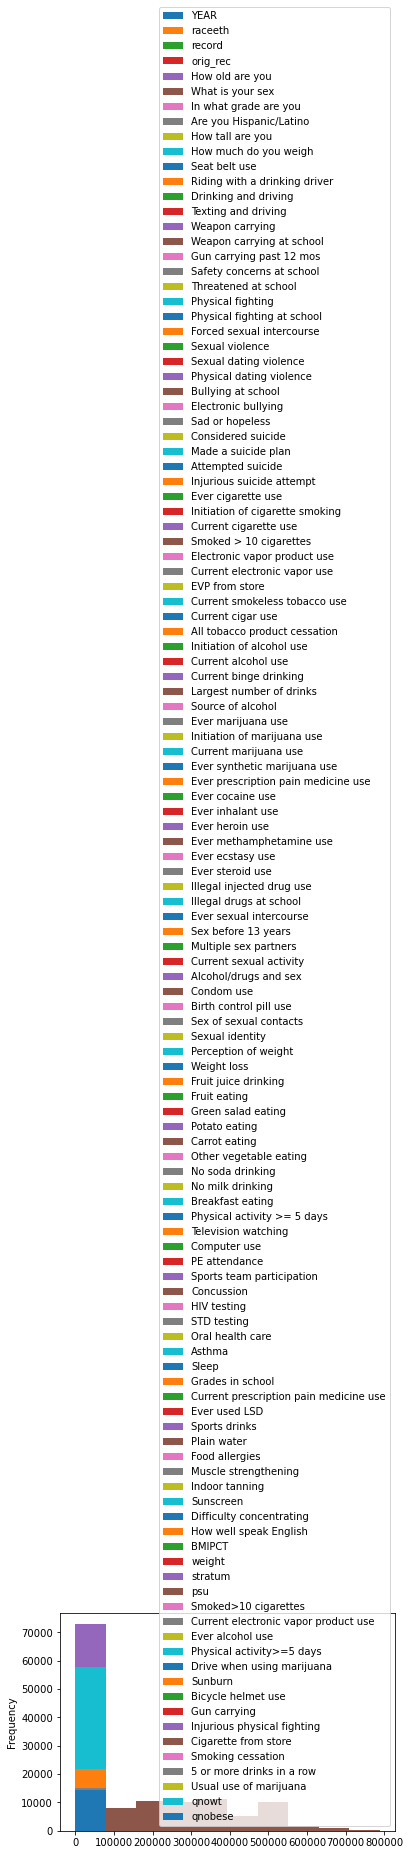

In [33]:
df.plot.hist()

In [ ]:
df.iloc[:, ]

## Modeling

In [24]:
df['Considered suicide'].value_counts()

2.0    59513
1.0    12695
Name: Considered suicide, dtype: int64

In [25]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets


from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [44]:
X = df.drop(columns=['Considered suicide', 'q6orig', 'q7orig', 'What is your race'], axis=1)
y = df['Considered suicide']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# model_log = logreg.fit(X_train, y_train)
# model_log

In [48]:
# model_log = logreg.fit(X_train, y_train)

In [38]:
df.dtypes

YEAR                                      float64
raceeth                                   float64
q6orig                                     object
q7orig                                     object
record                                    float64
orig_rec                                  float64
How old are you                           float64
What is your sex                          float64
In what grade are you                     float64
Are you Hispanic/Latino                   float64
What is your race                          object
How tall are you                          float64
How much do you weigh                     float64
Seat belt use                             float64
Riding with a drinking driver             float64
Drinking and driving                      float64
Texting and driving                       float64
Weapon carrying                           float64
Weapon carrying at school                 float64
Gun carrying past 12 mos                  float64
